<a href="https://colab.research.google.com/github/dkanzariya/AI-Notebooks/blob/master/Boston_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.5.0


## Part 1: Boston Housing Price Prediction with Feed Forward Neural Networks

Let's start with using a fully-connected neural network to do predict housing prices. The following image highlights the difference between regression and classification (see part 2). Given an observation as input, **regression** outputs a continuous value (e.g., exact temperature) and classificaiton outputs a class/category that the observation belongs to.

<img src="https://i.imgur.com/vvSoAzg.jpg" alt="classification_regression" width="400"/>

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57344/57026 [==============================] - 0s 0us/step


### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [3]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [4]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............
Final Root Mean Square Error on validation set: 2.323


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

In [5]:
print(hist)

           loss        mae         mse  ...    val_mae     val_mse  epoch
0    541.004028  21.376972  541.004028  ...  20.350914  453.791595      0
1    529.493958  21.144260  529.493958  ...  20.097591  442.173492      1
2    517.356384  20.895552  517.356384  ...  19.830048  430.215607      2
3    504.406128  20.627352  504.406128  ...  19.540985  417.606079      3
4    490.911621  20.340441  490.911621  ...  19.229366  404.248474      4
..          ...        ...         ...  ...        ...         ...    ...
710    6.857127   1.849715    6.857127  ...   1.987978    5.621348    710
711    6.876684   1.848637    6.876684  ...   1.988139    5.617476    711
712    6.835968   1.841583    6.835968  ...   1.975763    5.579385    712
713    6.842680   1.845028    6.842680  ...   1.962123    5.434510    713
714    6.841660   1.846798    6.841660  ...   1.946580    5.397134    714

[715 rows x 7 columns]


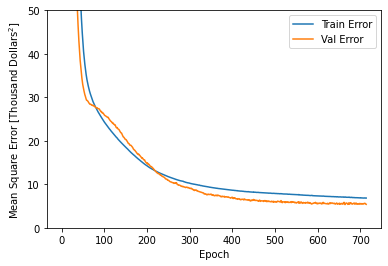

In [6]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Next, compare how the model performs on the test dataset:

In [7]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 3ms/step - loss: 17.9904 - mae: 2.7025 - mse: 17.9904
Root Mean Square Error on test set: 4.242


## Acknowledgements

The contents of this tutorial is based on and inspired by the work of [TensorFlow team](https://www.tensorflow.org) (see their [Colab notebooks](https://www.tensorflow.org/tutorials/)), our [MIT Human-Centered AI team](https://hcai.mit.edu), and individual pieces referenced in the [MIT Deep Learning](https://deeplearning.mit.edu) course slides.